In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy import stats

In [21]:
home_dir = '/home/hpcgies1/Masters-Thesis/AttemptFour/'

In [23]:
guse = np.load( open("/home/hpcgies1/rds/hpc-work/NIC/Data/GUSE/all_keys_guse.npy", "rb"))
guse.shape

(73000, 5, 512)

In [22]:
guse_sub2 = np.load( open(f"{home_dir}/Log/subject_2_baseline2/eval_out/output_guse.npy", "rb"))
guse_sub2.shape

(515, 1, 512)

In [28]:
sub2_cond = pd.read_csv(f"{home_dir}/TrainData/subj02_conditions2.csv")
sub2_test = sub2_cond['nsd_key'].loc[sub2_cond['is_test']==1].values
test_indices = sub2_test - 1

In [31]:
test_guse = guse[test_indices]
test_guse.shape

(515, 5, 512)

In [77]:
def fisher_z(r):
    """ Fisher z-score transformation """
#     r -= 1.0e-3 # r==1 results in inf values
    return 0.5 * (np.log(1 + r) - np.log(1 - r))


correlations = []
for trial in tqdm(range(test_guse.shape[0])):
    corr = np.corrcoef(test_guse[trial, :, :])
    mean_corr = np.mean(corr, axis=(0,1))
    correlations.append( mean_corr )

correlations_inf = []
for trial in tqdm(range(guse_sub2.shape[0])):
    t = np.concatenate((test_guse[trial,:,:], guse_sub2[trial,:,:]), axis=0)
    t = np.corrcoef(t)
    t = np.mean(t[-1][:-1])
    correlations_inf.append(t)

correlations = np.array(correlations)
correlations_inf = np.array(correlations_inf)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 515/515 [00:00<00:00, 5222.48it/s]


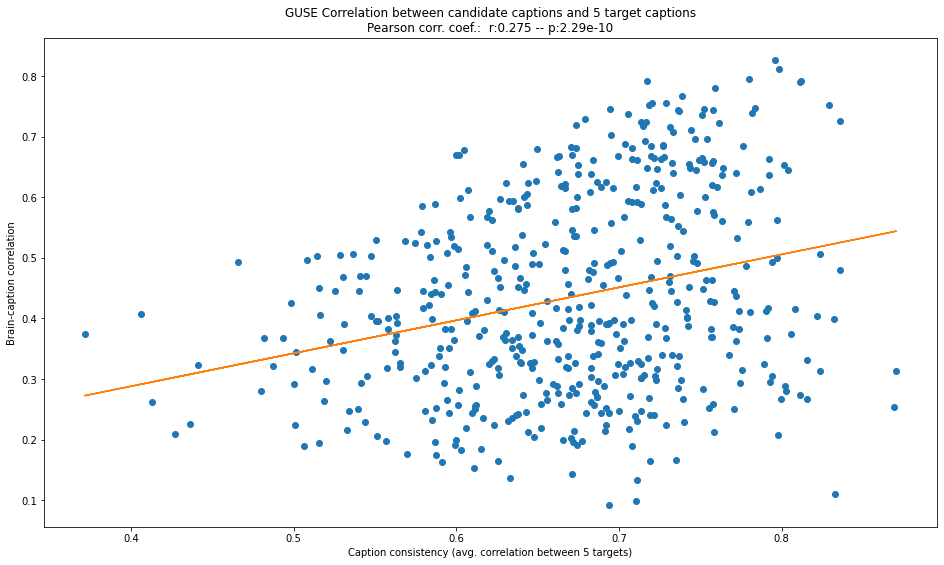

In [92]:
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize=(16,9))

m, b = np.polyfit(correlations, correlations_inf, 1)
r, p = stats.pearsonr(correlations, correlations_inf)

plt.scatter(correlations, correlations_inf)
plt.plot(correlations, m*correlations + b, c=colours[1])

plt.ylabel("Brain-caption correlation")
plt.xlabel("Caption consistency (avg. correlation between 5 targets)")
plt.title(f"GUSE Correlation between candidate captions and 5 target captions\nPearson corr. coef.:  r:{r:.3f} -- p:{p:.2e}")
# plt.savefig(f"{home_dir}/Plots/guse_consistency.png", bbox_inches='tight')
plt.show()

In [66]:
np.log(1.4)

0.3364722366212129